<a href="https://colab.research.google.com/github/smudalagi/Test/blob/main/Spam_Detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Spam Detection Project

## SMS Spam

SMS spam (sometimes called cell phone spam) is any junk message delivered to a mobile phone as text messaging through the Short Message Service (SMS)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import string
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/spam1.csv'

In [4]:
data=pd.read_csv(path,encoding = "ISO-8859-1")

In [5]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
data.shape

(5572, 5)

In [9]:
data.value_counts()

v1   v2                                                                                                                                               Unnamed: 2                                                                    Unnamed: 3                                Unnamed: 4                                              
ham  Edison has rightly said, \A fool can ask more questions than a wise man can answer\" Now you know why all of us are speechless during ViVa.. GM  GN                                                                            GE                                        GNT:-)"                                                     2
     I just lov this line: \Hurt me with the truth                                                                                                     I don't mind                                                                 i wil tolerat.bcs ur my someone..... But   Never comfort me with a lie\" gud ni8 and sweet dreams"    1
     When

In [10]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [11]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
data=data.rename({'v1':'Class','v2':'message'},axis=1)

In [13]:
data.head()

,Class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
data.columns

Index(['Class', 'message'], dtype='object')

# Exploratory Data Analysis

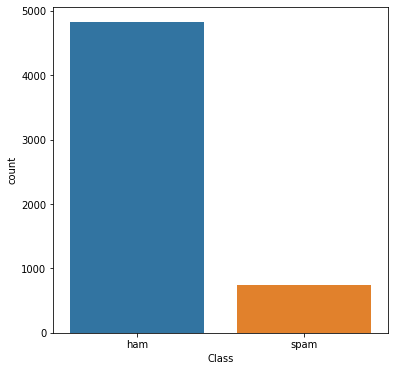

In [15]:
plt.figure(figsize=(6,6))
x=data.Class.value_counts()
sns.countplot(x="Class",data=data)

In [16]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
Stopwords=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(word for word in text.split() if word not in Stopwords)
    return text

In [18]:
data['clean_text'] = data['message'].apply(clean_text)
data.head()

,Class,message,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [19]:
X = data['clean_text']
y = data['Class']

In [20]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
ps=PorterStemmer
words=word_tokenize('clean_text')


In [22]:
#importing the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#lemmatizer=WordNetLemmatizer()

In [23]:
def message_text(mt):
  no_punctuation=[char for char in mt if char not in string.punctuation]
  no_punctuation=''.join(no_punctuation)
  return[word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]

In [24]:
data['message'].head(5).apply(message_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
bag_of_words_transformer=CountVectorizer(analyzer=message_text).fit(data['message'])

In [28]:
print(len(bag_of_words_transformer.vocabulary_))

11304


In [29]:
message_bagofwords=bag_of_words_transformer.transform(data['message'])

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(message_bagofwords)

In [31]:
message_tfidf=tfidf_transformer.transform(message_bagofwords)
print(message_tfidf.shape)

(5572, 11304)


In [34]:
from sklearn.naive_bayes import MultinomialNB
spam_detection_model=MultinomialNB().fit(message_tfidf,data['Class'])

In [36]:
# check model for prediction and expected value say for message#2 and message#5
message=data['message'][4]
bag_of_words_for_message=bag_of_words_transformer.transform([message])
tfidf=tfidf_transformer.transform(bag_of_words_for_message)

print('predicted',spam_detection_model.predict(tfidf)[0])

#print('expected',data.response[4])

predicted ham


In [37]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [38]:
#importing PCA for the dimensionality reduction 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [43]:
def Model(model, X, y):
#training and testing the data
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
    # model building using CountVectorizer and TfidfTransformer
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    


    y_pred = pipeline_model.predict(x_test)
    y_probas =pipeline_model.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test,y_probas,figsize=(12,8),title_fontsize=12,text_fontsize=16)
    plt.show()
    skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(12,8),title_fontsize=12,text_fontsize=16)
    plt.show()
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Classification Report is:\n",classification_report(y_test, y_pred))
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    print("Training Score:\n",pipeline_model.score(x_train,y_train)*100)

In [47]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Model Building
1. Logistic Regression


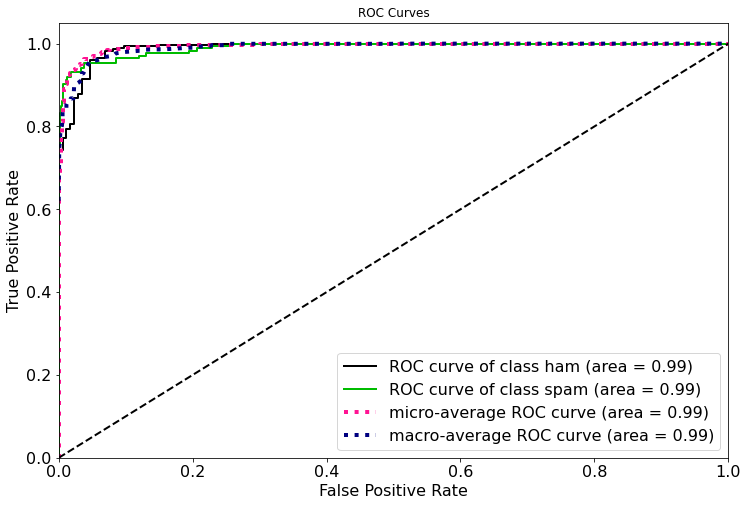

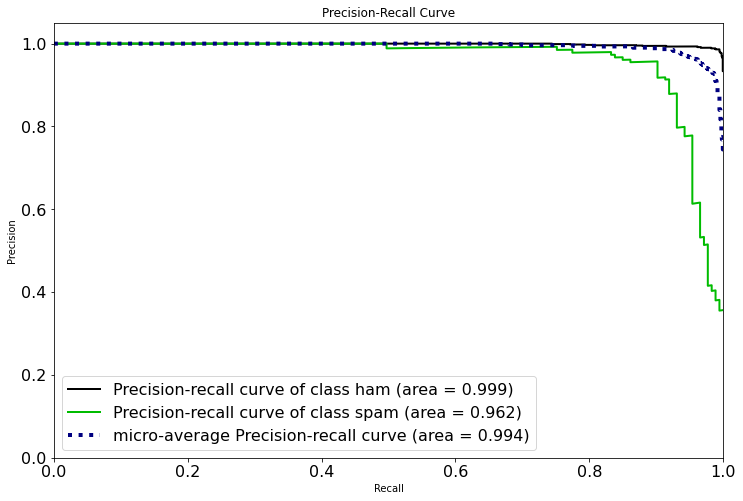

Confusion Matrix:
 [[1219    1]
 [  52  121]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1220
        spam       0.99      0.70      0.82       173

    accuracy                           0.96      1393
   macro avg       0.98      0.85      0.90      1393
weighted avg       0.96      0.96      0.96      1393

Accuracy: 96.19526202440775
Training Score:
 97.00885379277338


In [48]:
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
Model(model, X, y)

## 2. KNeighborsClassifier

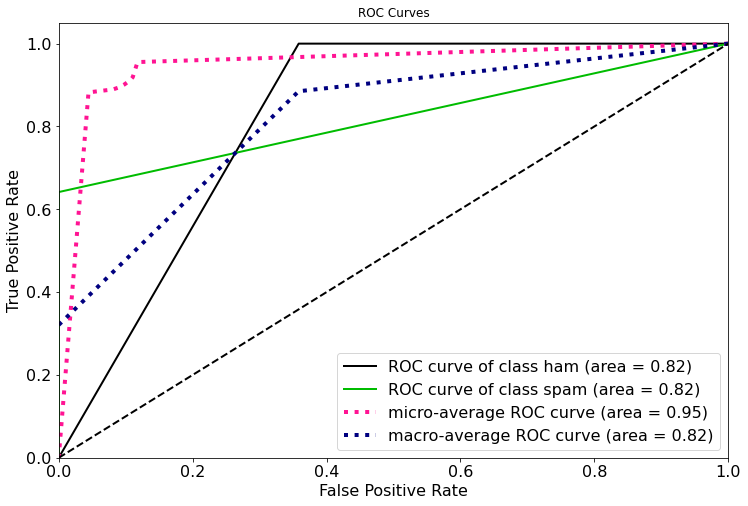

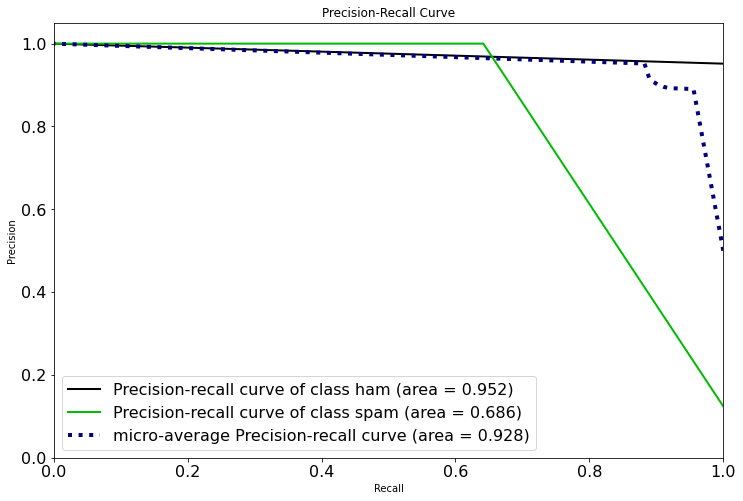

Confusion Matrix:
 [[1220    0]
 [ 137   36]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.90      1.00      0.95      1220
        spam       1.00      0.21      0.34       173

    accuracy                           0.90      1393
   macro avg       0.95      0.60      0.65      1393
weighted avg       0.91      0.90      0.87      1393

Accuracy: 90.1651112706389
Training Score:
 90.45226130653266


In [49]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)
Model(model,X,y)

## 3. SVC

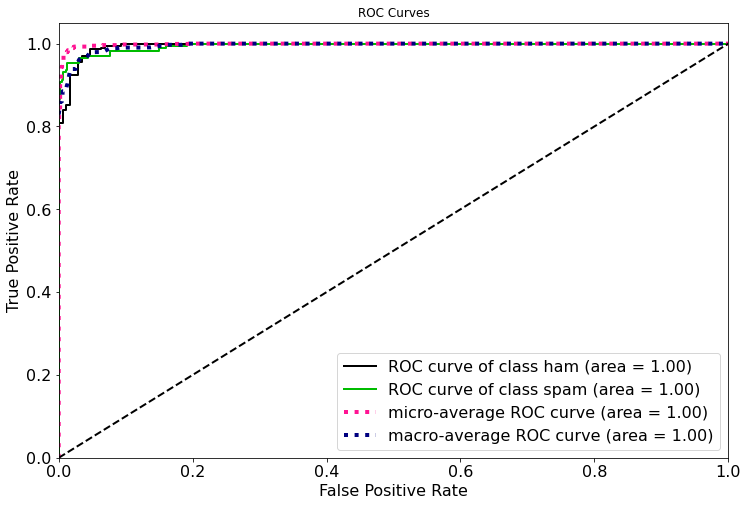

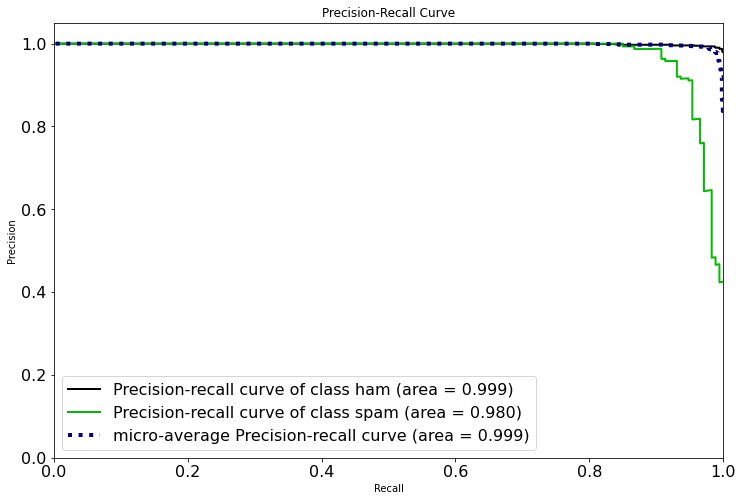

Confusion Matrix:
 [[1220    0]
 [  30  143]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1220
        spam       1.00      0.83      0.91       173

    accuracy                           0.98      1393
   macro avg       0.99      0.91      0.95      1393
weighted avg       0.98      0.98      0.98      1393

Accuracy: 97.84637473079684
Training Score:
 99.83249581239531


In [50]:
from sklearn.svm import SVC
model = SVC(probability=True )
Model(model, X, y)

## 4. Naive Bayes

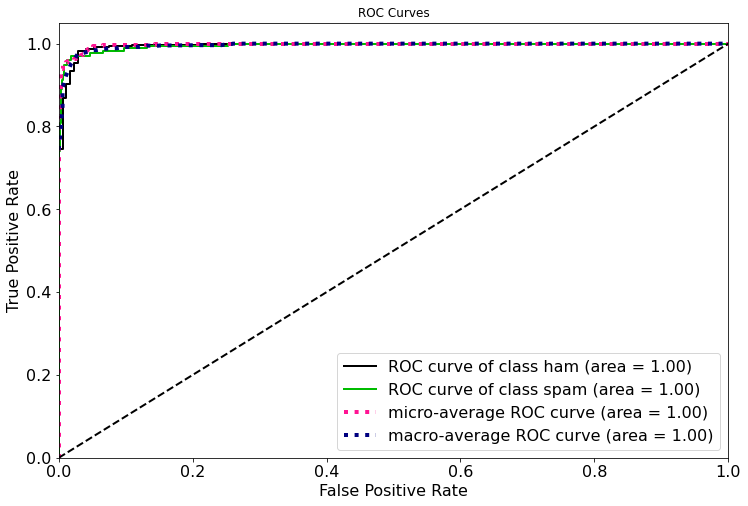

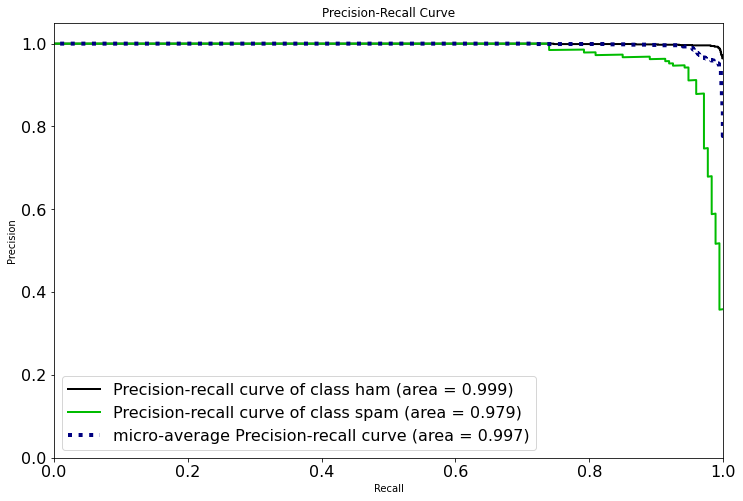

Confusion Matrix:
 [[1218    2]
 [  44  129]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1220
        spam       0.98      0.75      0.85       173

    accuracy                           0.97      1393
   macro avg       0.97      0.87      0.92      1393
weighted avg       0.97      0.97      0.96      1393

Accuracy: 96.69777458722182
Training Score:
 98.82747068676717


In [51]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
Model(model, X, y)

## 5. DECISION TREE CLASSIFIER

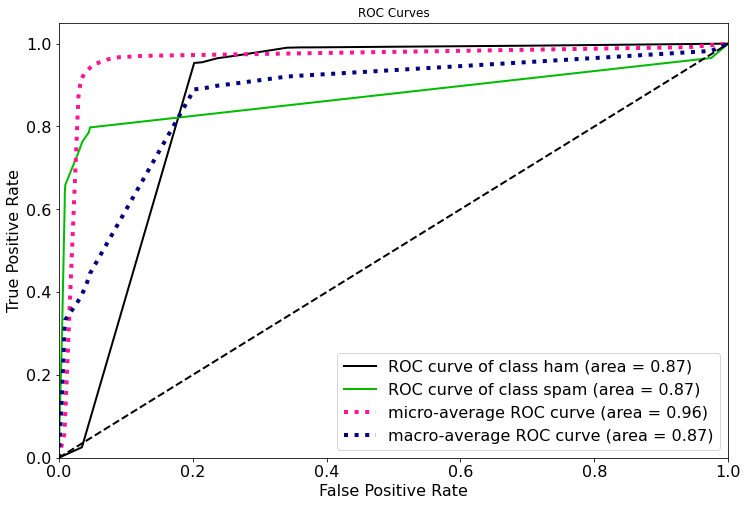

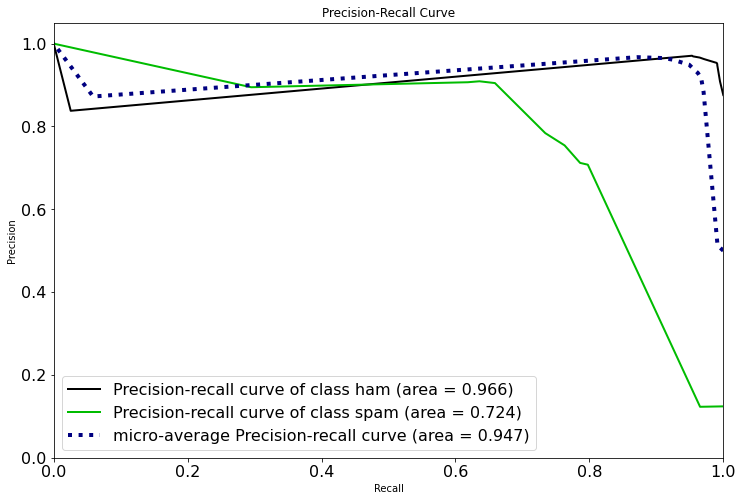

Confusion Matrix:
 [[1208   12]
 [  59  114]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.95      0.99      0.97      1220
        spam       0.90      0.66      0.76       173

    accuracy                           0.95      1393
   macro avg       0.93      0.82      0.87      1393
weighted avg       0.95      0.95      0.95      1393

Accuracy: 94.90308686288586
Training Score:
 96.21919119406557


In [52]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
Model(tree_clf,X,y)

## 6. RandomForestClassifier

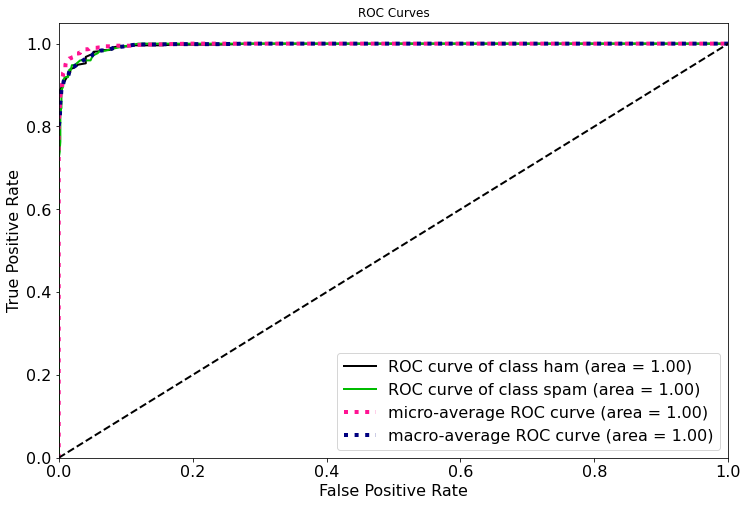

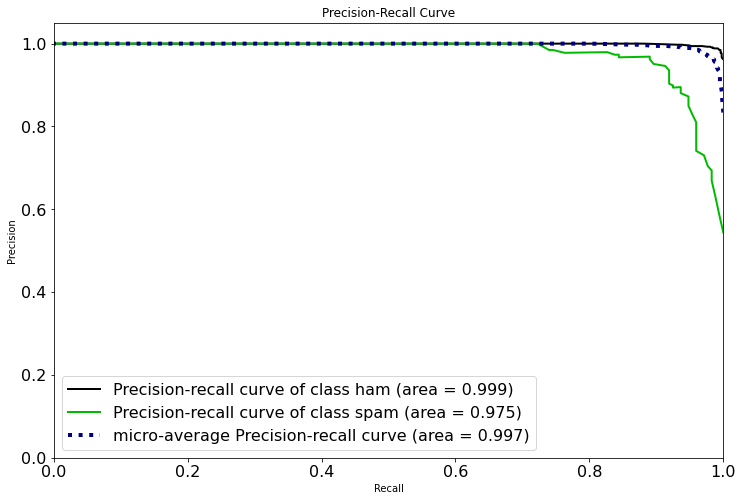

Confusion Matrix:
 [[1217    3]
 [  33  140]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1220
        spam       0.98      0.81      0.89       173

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.94      1393
weighted avg       0.97      0.97      0.97      1393

Accuracy: 97.4156496769562
Training Score:
 99.9760708303422


In [53]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
Model(model, X, y)

## 7. AdaBoostClassifier

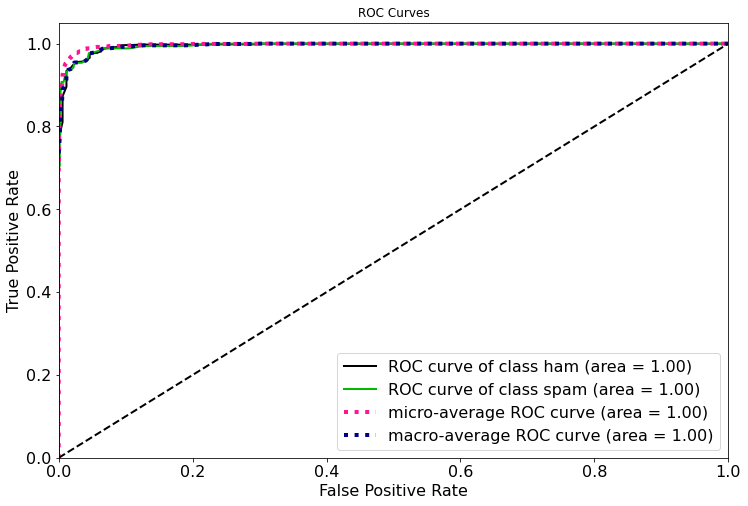

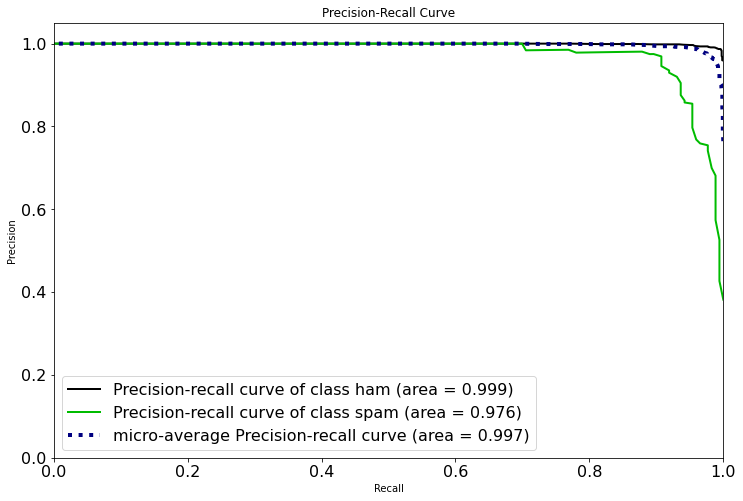

Confusion Matrix:
 [[1217    3]
 [  31  142]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1220
        spam       0.98      0.82      0.89       173

    accuracy                           0.98      1393
   macro avg       0.98      0.91      0.94      1393
weighted avg       0.98      0.98      0.97      1393

Accuracy: 97.5592246949031
Training Score:
 100.0


In [54]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
Model(model, X, y)

## 8. Gradient Boosting Classifier

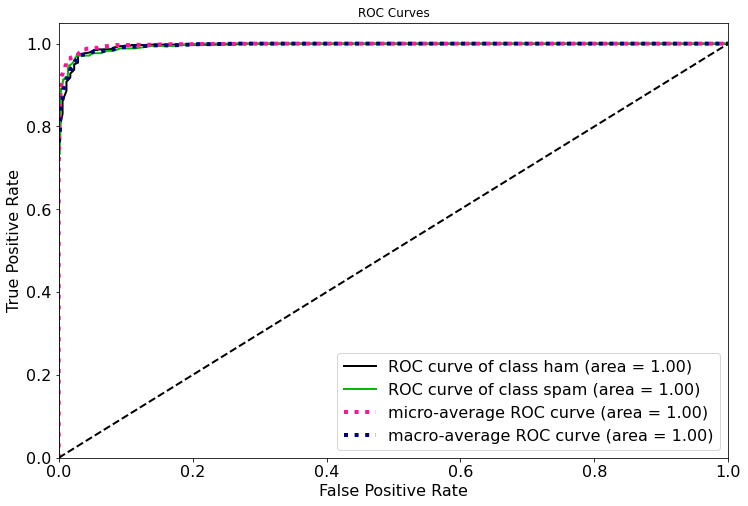

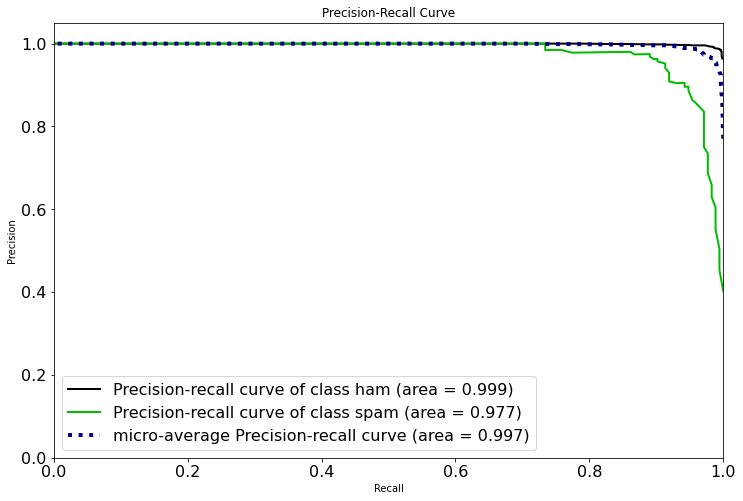

Confusion Matrix:
 [[1217    3]
 [  37  136]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1220
        spam       0.98      0.79      0.87       173

    accuracy                           0.97      1393
   macro avg       0.97      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393

Accuracy: 97.12849964106246
Training Score:
 100.0


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
Model(model, X, y)

## 9. XGBClassifier

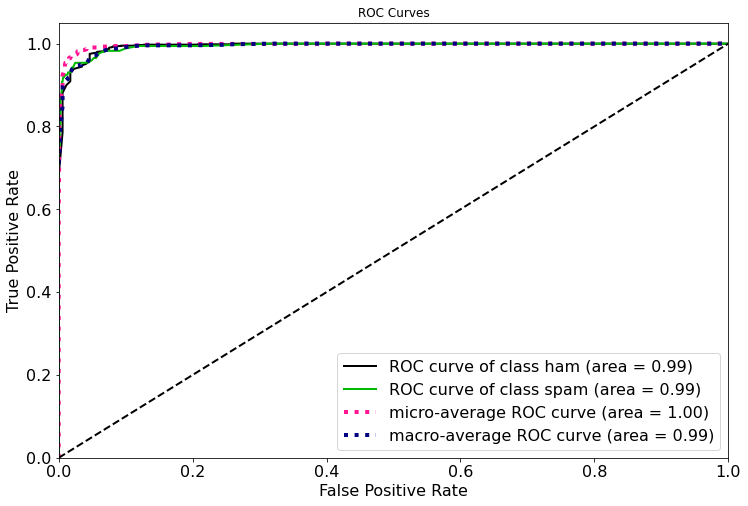

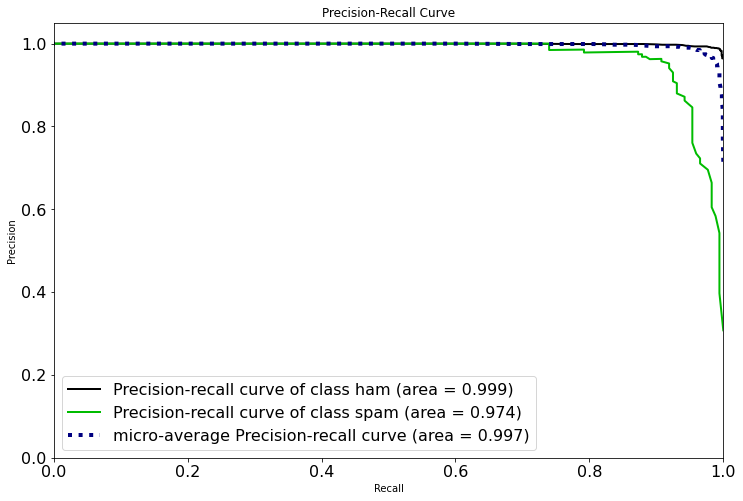

Confusion Matrix:
 [[1217    3]
 [  34  139]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1220
        spam       0.98      0.80      0.88       173

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393

Accuracy: 97.34386216798278
Training Score:
 100.0


In [56]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
Model(model, X, y)